<img src="zomato.jpg">

# Predicting Zomato Restaurants Rate

## 1. Business Problem

## 1.1 Problem Description

Restaurants from all over the world can be found here in Bengaluru. From United States to Japan, Russia to Antarctica, you get all type of cuisines here. Delivery, Dine-out, Pubs, Bars, Drinks,Buffet, Desserts you name it and Bengaluru has it. Bengaluru is best place for foodies. The number of restaurant are increasing day by day. Currently which stands at approximately 12,000 restaurants. With such an high number of restaurants. This industry hasn't been saturated yet. And new restaurants are opening every day. However it has become difficult for them to compete with already established restaurants. The key issues that continue to pose a challenge to them include high real estate costs, rising food costs, shortage of quality manpower, fragmented supply chain and over-licensing. This Zomato data aims at analysing demography of the location. Most importantly it will help new restaurants in deciding their theme, menus, cuisine, cost etc for a particular location. It also aims at finding similarity between neighborhoods of Bengaluru on the basis of food. 

- Does demography of area matters?
- Does location of particular type of restraurant depends on people living in that area>
- Does theme of restraurant matters?
- Is food chain category restraurant likely to have more customers than its counter part?
- Are any neighbourhood on similar based on the type of food?
- Is particular neighbours is famous for itw own kind of food?
- If two neighbours are similar does that mean these are related or particular group of people live in neighbourhood or these are places to eat.
- What kind of food is famous in locality.
- Do entire locality loves veg food, if yes then locality populated by particular set of people eg Jain, Gujarati,Marwadi who are basically veg.


## 1.2 Problem Statement

The dataset also contains reviews for each of the restaurant which will help in finding overall rating for the place. So we will try to predict rating for particular restaurant.

## 1.3 Real world/Business Objectives

We need to predict rating based on different parameters like Average_cost for two people, Online Order available, foods,menu list, most liked dishes etc features.

## 1.4 Machine Learning Formulation

Here we suppose to predicted rating of restaurant, so it is basically **Regression** problem.

## 1.5 Perfomance Metric

We will try to reduce Mean Square Error ie **MSE** as minimum as possible. So it is **Regression** problem reducing **MSE**.
- Ideal MSE is 0.

## 2. Machine Learning Problem

### 2.1 Data

#### Data Acquire

https://www.kaggle.com/himanshupoddar/zomato-bangalore-restaurants

### 2.1.1 Understanding the data

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ast

from wordcloud import WordCloud, STOPWORDS


#%matplotlib notebook
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [155]:
data = pd.read_csv('data/zomato.csv')
data.shape

(51717, 17)

In [156]:
data.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [157]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
url                            51717 non-null object
address                        51717 non-null object
name                           51717 non-null object
online_order                   51717 non-null object
book_table                     51717 non-null object
rate                           43942 non-null object
votes                          51717 non-null int64
phone                          50509 non-null object
location                       51696 non-null object
rest_type                      51490 non-null object
dish_liked                     23639 non-null object
cuisines                       51672 non-null object
approx_cost(for two people)    51371 non-null object
reviews_list                   51717 non-null object
menu_item                      51717 non-null object
listed_in(type)                51717 non-null object
listed_in(city)                51717 non-nul

#### Observation

Rate, dish_liked, phone , approx_cost(for two people) values are missing.

In [158]:
data['votes'].describe()

count    51717.000000
mean       283.697527
std        803.838853
min          0.000000
25%          7.000000
50%         41.000000
75%        198.000000
max      16832.000000
Name: votes, dtype: float64

#### Observation
- Minimum vote's value is 0, can be interpret as there are some restaurants who have 0 vote
- Maximum vote's value is 16832, there is a restaurant who has 16832.
- Average vote's values is 284, so average 284 votes for restaurant

In [159]:
data.columns

Index(['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')

#### Columns description

- url: contains the url of the restaurant in the zomato website

- address: contains the address of the restaurant in Bengaluru

- name: contains the name of the restaurant

- online_order: whether online ordering is available in the restaurant or not

- book_table: table book option available or not

- rate: contains the overall rating of the restaurant out of 5

- votes: contains total number of rating for the restaurant as of the above mentioned date

- phone: contains the phone number of the restaurant

- location: contains the neighborhood in which the restaurant is located

- rest_type: restaurant type

- dish_liked: dishes people liked in the restaurant

- cuisines: food styles, separated by comma

- approx_cost(for two people): contains the approximate cost for meal for two people

- reviews_list: list of tuples containing reviews for the restaurant, each tuple

- menu_item: contains list of menus available in the restaurant

- listed_in(type): type of meal

- listed_in(city): contains the neighborhood in which the restaurant is listed

### 2.2 Data Preprocess

###  2.2.1 Adjust column names and dropped irrelevant columns

In [160]:
# explore columns related to the addrress
data.loc[:,['address','location','listed_in(city)']].sample(8,random_state=1)

,address,location,listed_in(city)
8157,"2A/3, 15th Cross, Green Garden Layout, Shirdi ...",Marathahalli,Brookefield
32498,"18, Shreenidhi Arcade, Maruthi Nagar Main Road...",BTM,Koramangala 6th Block
4679,"56, Near Passport Office, Outer Ring Road, Bel...",Bellandur,Bellandur
2445,"14/6, 9th Main Road, Opposite Water Tank, 100 ...",BTM,Bannerghatta Road
27316,"321/3A, Sharif Complex, Hosur Main Road, Oppos...",Hosur Road,Koramangala 4th Block
2735,"4/5, 5th Cross, Laxmi Road, Shanti Nagar, Bang...",Shanti Nagar,Basavanagudi
34577,"9, Maruthi Nagar, Madiwala, BTM, Bangalore",BTM,Koramangala 6th Block
32233,"13th cross, 16th main, Tavarekere Main Road, B...",BTM,Koramangala 6th Block


Here, we can see that 3 column are representing same information, so just dropping column which are not important.
- we are going to keep the location column and drop the address and listed_in(city) columns
- columns url , phone , we are not interested in ,to be dropped too


In [161]:
# drop unnecessary columns
column_to_drop = ['address','url' ,'listed_in(city)', 'phone']
data.drop(columns=column_to_drop, axis=1,inplace=True)

In [162]:
data.columns

Index(['name', 'online_order', 'book_table', 'rate', 'votes', 'location',
       'rest_type', 'dish_liked', 'cuisines', 'approx_cost(for two people)',
       'reviews_list', 'menu_item', 'listed_in(type)'],
      dtype='object')

###  2.2.2 Remove Duplicates

**Q.1) Is there duplicate values present in dataset? If yes then many of them are duplicate?**

In [163]:
# check for duplicate values
print("No of Duplicates in dataset:  ",data.duplicated().sum())

No of Duplicates in dataset:   9809


In [164]:
# drop the duplicates
data.drop_duplicates(inplace=True)

### 2.2.3 Removing Null values

**Q.2) Is there NULL values present in dataset? If yes then many they are (in %)?**

In [165]:
# check for null values
((data.isna().sum()/data.shape[0])*100).round(2)

name                            0.00
online_order                    0.00
book_table                      0.00
rate                           10.15
votes                           0.00
location                        0.03
rest_type                       0.41
dish_liked                     48.22
cuisines                        0.09
approx_cost(for two people)     0.60
reviews_list                    0.00
menu_item                       0.00
listed_in(type)                 0.00
dtype: float64

#### Observation:
- We can oberve that 54% dish_liked is missing as well as 15% rate values are missing.
- If we throw everything out, mean we are loosing more than 60% points.

**Q.3) Can we do something, can we save some of the points?**

***But before removing NULL values lets understand, Rate colomn.***

In [166]:
# check for unique values in the rate column
data.rate.unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', nan, '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

#### Observation:
- There are some points which has 'NEW' rating and '-' rating, which is completely incorrect.

In [167]:
data['rate'] = data['rate'].replace('NEW',np.NaN)
data['rate'] = data['rate'].replace('-',np.NaN)

We can see that by default it has '/5' (divide by 5) arithmatic character, first we will remove this then proceed.

In [168]:
data['rate'] = data.loc[:,'rate'].replace('[ ]','',regex = True)
data['rate'] = data['rate'].astype(str)
data['rate'] = data['rate'].apply(lambda r: r.replace('/5',''))
data['rate'] = data['rate'].apply(lambda r: float(r))

data['rate'].head(2)

0    4.1
1    4.1
Name: rate, dtype: float64

***As we understood Rate colomn above, lets understand, dish_liked***<br>
But before that first go throght "Review_List"

In [169]:
type(data.reviews_list[0])

str

In [170]:
# return to a list of tuples
data.reviews_list = data.reviews_list.apply(lambda x: ast.literal_eval(x))
type(data.reviews_list[0])

list

In [171]:
# check for the first input
data.reviews_list[0][0]

('Rated 4.0',
 'RATED\n  A beautiful place to dine in.The interiors take you back to the Mughal era. The lightings are just perfect.We went there on the occasion of Christmas and so they had only limited items available. But the taste and service was not compromised at all.The only complaint is that the breads could have been better.Would surely like to come here again.')

#### Observation:
- We can see that in "Review_List" starting line come up with rating. 'Rated 4.0'.
- We can use this values and filled up 'Rate' colomn.

**Q3A. Can we use this values as fill up in 'Rate' Colomn wherever it is missing? If yes then image we have saved that data point,ie information.**

In [172]:
# extract the rate for the first input from the review column
extracted = [float(i[0].replace('Rated','').strip()) for i in data.reviews_list[0]]
extracted

[4.0, 4.0, 2.0, 4.0, 5.0, 5.0, 4.0, 4.0, 5.0, 4.0, 4.0, 4.0]

Above are review for particular restaurant, we can use mean value.

In [173]:
extracted_mean = round((sum(extracted)/len(extracted)),1)
extracted_mean

4.1

- This is great. Lets Compare this value with 'Rate' colomn value.

In [174]:
print("Extracted Rate: ",extracted_mean)
print("Original Rate: ",data.rate[0])

Extracted Rate:  4.1
Original Rate:  4.1


- This is brillliant, lets do for all.

In [175]:
def extract_features_from_review_list(x):
    '''
    extract the rate value out of a string inside tuple
    '''
    # ensure that x is not Null and there is more than one rate
    if not x or len(x) <= 1:
        return None
    rate = [float(i[0].replace('Rated','').strip())  for i in x if type(i[0])== str]
    return round((sum(rate)/len(rate)),1)

In [176]:
# create new column
data['review_rate']  = data.reviews_list.apply(lambda x : extract_features_from_review_list(x))

In [177]:
## Compare "Original Rate" vs "Rate extracted from Review List"
data.loc[:,['rate','review_rate']].sample(10,random_state=1)

,rate,review_rate
43076,4.0,4.0
49259,3.3,NaN
43257,4.5,4.2
30157,3.3,3.1
41110,3.8,4.0
34220,4.0,4.0
42520,3.0,3.3
45657,3.2,2.3
38218,3.3,3.9
4568,NaN,3.5


- Quite Closer.
- Ok, so we can replace missing value with this new adjustment.

In [178]:
# get the before number of null values
data.rate.isna().sum()

5914

In [179]:
# apply the changes
nan_index = data.query('rate != rate & review_rate == review_rate').index
for i in nan_index:
    data.loc[i,'rate'] = data.loc[i,'review_rate'] 

In [180]:
# update the number of null values now
data.rate.isna().sum()

4861

- Please notice we have saved more than 1000 points.

In [181]:
# check now
((data.isna().sum()/data.shape[0])*100).round(2)

name                            0.00
online_order                    0.00
book_table                      0.00
rate                           11.60
votes                           0.00
location                        0.03
rest_type                       0.41
dish_liked                     48.22
cuisines                        0.09
approx_cost(for two people)     0.60
reviews_list                    0.00
menu_item                       0.00
listed_in(type)                 0.00
review_rate                    25.71
dtype: float64

- Purpose behind filling missing values has being accomplished, we can remove 'review_rate' colomn

In [182]:
# # first let's drop the review_rate column now
# data.drop(columns='review_rate',axis=1,inplace=True)

Now we will remove missing values, from 'rate' and 'average_cost' colomn

In [183]:
# drop null values
data.dropna(subset=['rate', 'approx_cost(for two people)'],inplace=True)

In [184]:
# check shape
data.shape

(36840, 14)

In [185]:
data.isna().sum()

name                               0
online_order                       0
book_table                         0
rate                               0
votes                              0
location                           0
rest_type                        121
dish_liked                     15277
cuisines                           8
approx_cost(for two people)        0
reviews_list                       0
menu_item                          0
listed_in(type)                    0
review_rate                     5889
dtype: int64

#### Observation:
- Here count 0 means there is no missing value.

In [186]:
# remove cuisines missing values
data=data[data.cuisines.isna()==False]

In [187]:
data.rename(columns={'approx_cost(for two people)': 'average_cost'}, inplace=True)

In [188]:
# check for percentage of null values 
((data.isna().sum()/data.shape[0])*100).round(2)

name                0.00
online_order        0.00
book_table          0.00
rate                0.00
votes               0.00
location            0.00
rest_type           0.33
dish_liked         41.46
cuisines            0.00
average_cost        0.00
reviews_list        0.00
menu_item           0.00
listed_in(type)     0.00
review_rate        15.98
dtype: float64

In [189]:
# make lower case
data.dish_liked = data.dish_liked.apply(lambda x:x.lower().strip() if isinstance(x,str) else x)

In [190]:
menu_list = []

# collect the dishes' names and make a menu list for all kind of dishes
for dish in data.dish_liked.tolist():
    if isinstance(dish,str) and len(dish)>0:
        for e in dish.split(','):
            menu_list.append(e)
len(menu_list)

118363

In [191]:
# Now collect the unique dish name 
menu_set = set(menu_list)

As we replace review_rate into missing rate values can we do the same here.<br><br>
**Q.3B) Can we replace missing 'dish_liked' with 'menu_list' values?**

In [192]:
# clear the text
def clear_text(t):
    '''
    clear the input text t
    '''
    return ' '.join([i[1].replace("RATED\n  ",'') for i in t]).encode('utf8').decode('ascii',errors='replace').\
           replace('?','').replace('�','').replace('\n','').replace('.',' ').strip().lower()

In [193]:
# make a new column reviews_text
data['reviews_text'] = data.reviews_list.apply(lambda x: clear_text(x))

In [194]:
# check part of reviews text for the first restaurant
data.reviews_text[0][:500]

'a beautiful place to dine in the interiors take you back to the mughal era  the lightings are just perfect we went there on the occasion of christmas and so they had only limited items available  but the taste and service was not compromised at all the only complaint is that the breads could have been better would surely like to come here again  i was here for dinner with my family on a weekday  the restaurant was completely empty  ambience is good with some good old hindi music  seating arrange'

**Clean up dist_like**
- convert text to lower case.
- missing value could extract from review_list

In [195]:
data.dish_liked.nunique()

5250

In [196]:
# make lower case
data.dish_liked = data.dish_liked.apply(lambda x:x.lower().strip() if isinstance(x,str) else x)

In [197]:
# example
data.dish_liked[10000]

nan

In [198]:
# the solution 
menu_set.intersection(data.reviews_text[10000].split(' '))

{'chicken', 'fish', 'rice', 'thali'}

In [199]:
#creat a new column for the reviewed dish
data['dish_n_review'] = data.reviews_text.apply(lambda x: ', '.join(list(menu_set.intersection(x.split(' ')))))

In [200]:
# get sample to compare
data.query('dish_liked != dish_liked')[['dish_liked','dish_n_review']].sample(5,random_state=1)

,dish_liked,dish_n_review
32901,NaN,"kheer, halwa"
44323,NaN,"chicken, rice, prawn, tikka, shawarma"
6479,NaN,
11046,NaN,rice
50112,NaN,"cappuccino, coffee"


So now, we can replace this missed values from the dish_n_review

In [201]:
# fill in the missing values in dish_liked column with data from reviews
nan_index = data.query('dish_liked != dish_liked & dish_n_review == dish_n_review').index
for i in nan_index:
    data.loc[i,'dish_liked'] = data.loc[i,'dish_n_review']

In [202]:
# Now let's test our work
data.dish_liked[10000]

'chicken, thali, rice, fish'

- Now we can drop the menu_list & menu_set


In [203]:
del menu_list
del menu_set

In [204]:
# first let's drop the review_rate column now
data.drop(columns=['reviews_text','review_rate','dish_n_review'],axis=1,inplace=True)

In [205]:
# check for null values
((data.isna().sum()/data.shape[0])*100).round(3)

name               0.000
online_order       0.000
book_table         0.000
rate               0.000
votes              0.000
location           0.000
rest_type          0.329
dish_liked         0.000
cuisines           0.000
average_cost       0.000
reviews_list       0.000
menu_item          0.000
listed_in(type)    0.000
dtype: float64

In [206]:
data.shape

(36832, 13)

- Now thing looked quite good. There is no missing values.

### 2.1.2 Data Visualizations

**Q.4) What is distrubution of 'Rate column'?**

Now it is fine, now we can proceed.

Mean is :  3.7208921589921835


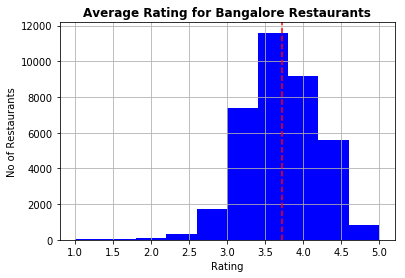

In [207]:
data.rate.hist(color='blue')
plt.axvline(x= data.rate.mean(),ls='--',color='red')
plt.title('Average Rating for Bangalore Restaurants',weight='bold')
plt.xlabel('Rating')
plt.ylabel('No of Restaurants')
print("Mean is : ",data.rate.mean())

#### Observation:
- Average rating is 3.7 in banglore for zomato.

**Q.5) Which are the top 20 restaurant in the Banglore? What is their count**

In [208]:
data.name.value_counts().head()

Onesta               85
Cafe Coffee Day      84
Empire Restaurant    69
Kanti Sweets         66
Just Bake            62
Name: name, dtype: int64

Text(0.5,1,'Name Vs Number of Restaurants')

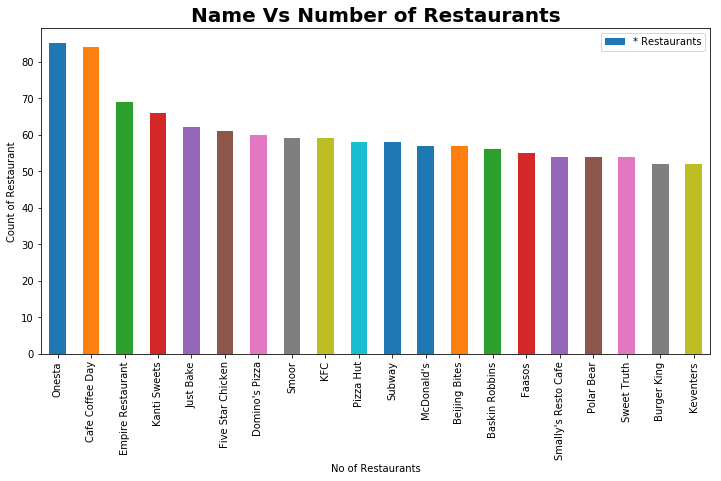

In [209]:
plt.figure(figsize=(12,6))
ax =data.name.value_counts()[:20].plot(kind='bar')
ax.legend(['* Restaurants'])
plt.xlabel('No of Restaurants')
plt.ylabel('Count of Restaurant')
plt.title("Name Vs Number of Restaurants", fontsize=20, weight='bold')

#### Observation

- we can say that 'Onesta' day has highest count among all

**Q.6) How many Restaurant accepting online orders?**

Yes    24969
No     11863
Name: online_order, dtype: int64

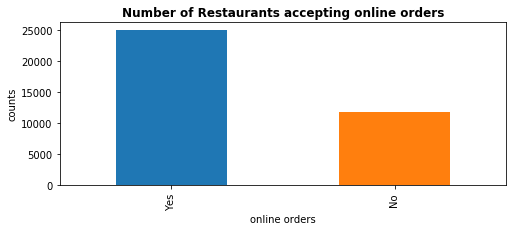

In [210]:
plt.figure(figsize=(8,3))
ax =data.online_order.value_counts().plot(kind='bar')
plt.title('Number of Restaurants accepting online orders', weight='bold')
plt.xlabel('online orders')
plt.ylabel('counts')

data.online_order.value_counts()

#### Observation:
- Most of order are onlines.
- no missing values in online order colomn

**Q.7) How many Restaurant have option to book a table?**

No     30799
Yes     6033
Name: book_table, dtype: int64

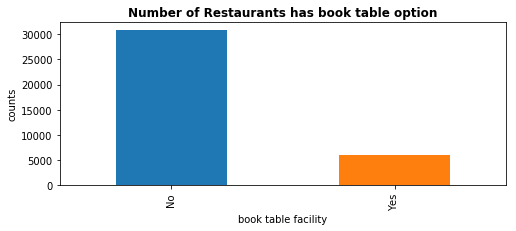

In [211]:
plt.figure(figsize=(8,3))
ax =data.book_table.value_counts().plot(kind='bar')
plt.title('Number of Restaurants has book table option', weight='bold')
plt.xlabel('book table facility')
plt.ylabel('counts')

data.book_table.value_counts()

#### Observation
- Most of restaurant do not have book table facility

**Q.8) In banglore city,in which area has maximum number of restaurants? Also find percetage for the same.**

Text(0.5,1,'Location')

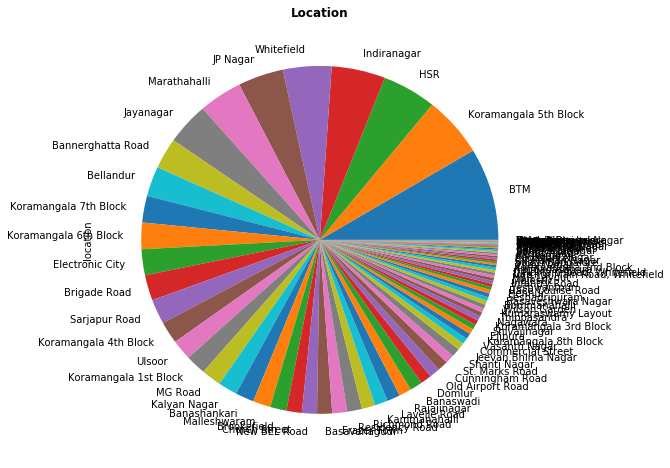

In [212]:
plt.figure(figsize=(8,8))
ax =data.location.value_counts().plot(kind='pie')
plt.title('Location', weight='bold')

Its very complicated to understand so we will limit ourself to TOP 10 locations

Text(0.5,1,'Location')

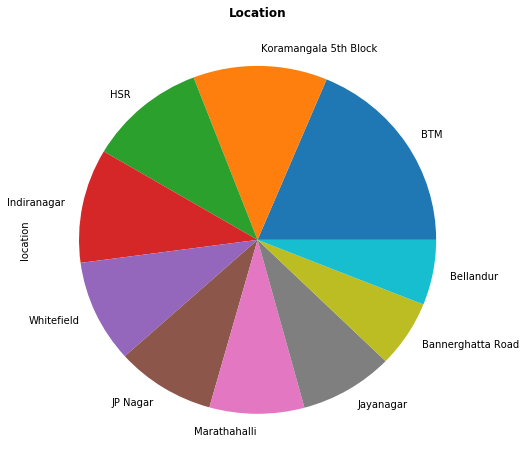

In [213]:
plt.figure(figsize=(8,8))
ax =data.location.value_counts()[:10].plot(kind='pie')
plt.title('Location', weight='bold')

#### Observation
- We can say that BTM location, where most of restaurant are available

**Q9.1) Percentage.**

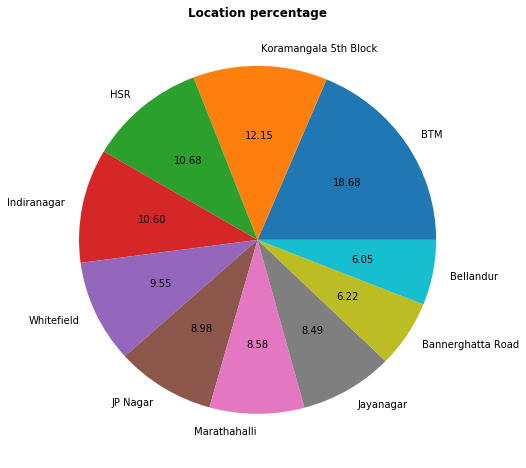

In [214]:
## https://stackoverflow.com/questions/6170246/how-do-i-use-matplotlib-autopct

plt.figure(figsize=(8,8))
values = data.location.value_counts()[:10]
labels = data['location'].value_counts()[:10].index
plt.pie(values, labels=labels, autopct='%.2f')
plt.title('Location percentage', weight='bold')
plt.show()

#### Observation:

Now picture seems very clear, maximum restaurant are in BTM follows by HSR,Koramangla, JP Nagar, .. so on.

**Q9.2 Now, we know percentage of top 10 area, lets find count of each area.**

Text(0,0.5,'counts')

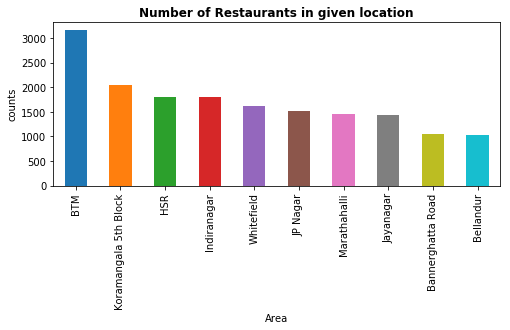

In [215]:
plt.figure(figsize=(8,3))
ax =data.location.value_counts()[:10].plot(kind='bar')
plt.title('Number of Restaurants in given location', weight='bold')
plt.xlabel('Area')
plt.ylabel('counts')

#### Observation

- BTM area has around 3k restaurants.

In [216]:
data['location'].nunique() ## Neighbourhoods in banglore 

92

**Q.10) What type of restaurant are there in banglore? also percetage and counts**

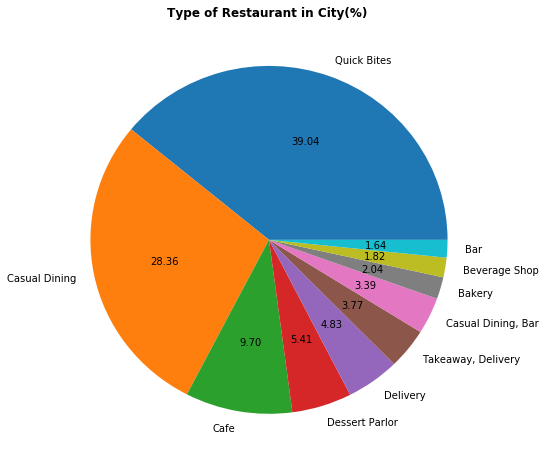

In [217]:
plt.figure(figsize=(8,8))
values = data.rest_type.value_counts()[:10]
labels = data['rest_type'].value_counts()[:10].index
plt.pie(values, labels=labels, autopct='%.2f')
plt.title('Type of Restaurant in City(%) ', weight='bold')
plt.show()

Text(0,0.5,'counts')

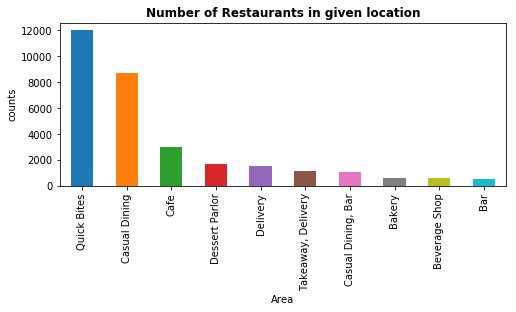

In [218]:
plt.figure(figsize=(8,3))
ax =data.rest_type.value_counts()[:10].plot(kind='bar')
plt.title('Number of Restaurants in given location', weight='bold')
plt.xlabel('Area')
plt.ylabel('counts')

#### Observation

- "Quick beats" is leading in the race, which is close to 12k follow by "Causal Dining" which is around 8K

**Q.11) What is the Average cost in restaurants?**

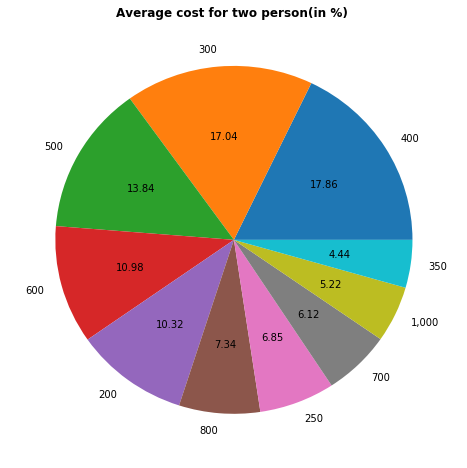

In [219]:
plt.figure(figsize=(8,8))
values = data.average_cost.value_counts()[:10]
labels = data['average_cost'].value_counts()[:10].index
plt.pie(values, labels=labels, autopct='%.2f')
plt.title('Average cost for two person(in %) ', weight='bold')
plt.show()

#### Observation
There is 17.86% percetage chances that for two person average cost will be 400 and 17.04% chance that cost will be 300. so on.

**Q.12) Which dish are most famous/favourite dish in restaurants?**

In [220]:
data.dish_liked.nunique()

7503

Before we dive in remember that at initial stages we observe that dist_like colomn has some missing values. so first remove missing values then proceed.

In [221]:
#lets delete the nulll values

data1 = data.copy()

dishes_data = data1[data1.dish_liked.notnull()]
dishes_data.dish_liked = dishes_data.dish_liked.apply(lambda x:x.lower().strip())

In [222]:
dishes_data.isnull().sum()

name                 0
online_order         0
book_table           0
rate                 0
votes                0
location             0
rest_type          121
dish_liked           0
cuisines             0
average_cost         0
reviews_list         0
menu_item            0
listed_in(type)      0
dtype: int64

In [223]:
dishes_data.dish_liked[:10]

0    pasta, lunch buffet, masala papad, paneer laja...
1    momos, lunch buffet, chocolate nirvana, thai g...
2    churros, cannelloni, minestrone soup, hot choc...
3                                          masala dosa
4                                  panipuri, gol gappe
5    onion rings, pasta, kadhai paneer, salads, sal...
6                                              chicken
7    farmhouse pizza, chocolate banana, virgin moji...
8    pizza, mocktails, coffee, nachos, salad, pasta...
9    waffles, pasta, coleslaw sandwich, choco waffl...
Name: dish_liked, dtype: object

We can see that each row has contained multiple dishes separated by "commma".

In [224]:
# count each dish to see how many times each dish repeated
dish_count = []
for i in dishes_data.dish_liked: ## iterate in each rows in table
    for t in i.split(','):
        t = t.strip() # remove the white spaces to get accurate results
        dish_count.append(t)

In [225]:
dish_count[:10] #lets see favourite top 10 dishes

['pasta',
 'lunch buffet',
 'masala papad',
 'paneer lajawab',
 'tomato shorba',
 'dum biryani',
 'sweet corn soup',
 'momos',
 'lunch buffet',
 'chocolate nirvana']

Text(0,0.5,'Count')

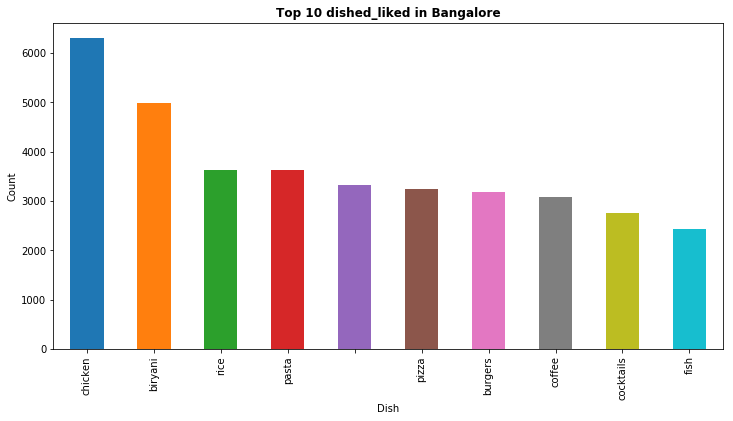

In [226]:
plt.figure(figsize=(12,6)) 
pd.Series(dish_count).value_counts()[:10].plot(kind='bar')
plt.title('Top 10 dished_liked in Bangalore',weight='bold')
plt.xlabel('Dish')
plt.ylabel('Count')

#### Observation

- We can see that 'pasta' is most favourite dish followed by 'burger' followed by 'cocktails'.

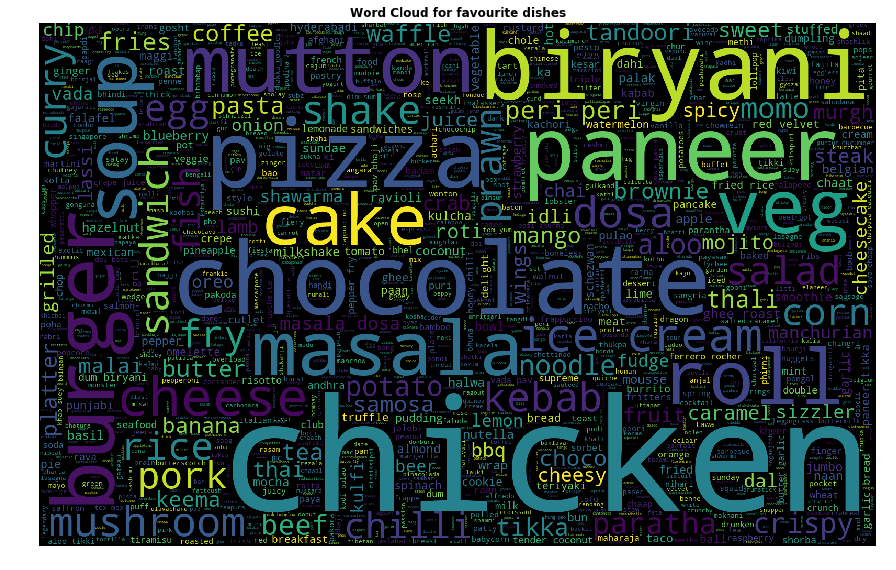

In [227]:
dish_set = set(dish_count)
dish_word_cloud = ', '.join(dish_set)

plt.figure( figsize=(15,10) )
wc = WordCloud(width=1600, height=1000,background_color="black", max_words=len(dish_word_cloud))
wc.generate(dish_word_cloud)
plt.imshow(wc, interpolation='bilinear')
plt.title('Word Cloud for favourite dishes',weight='bold')
plt.axis("off")
plt.imshow(wc)
plt.show()

**Q.9) Lets see 'Rate' vs 'Restaurant type' graph.**

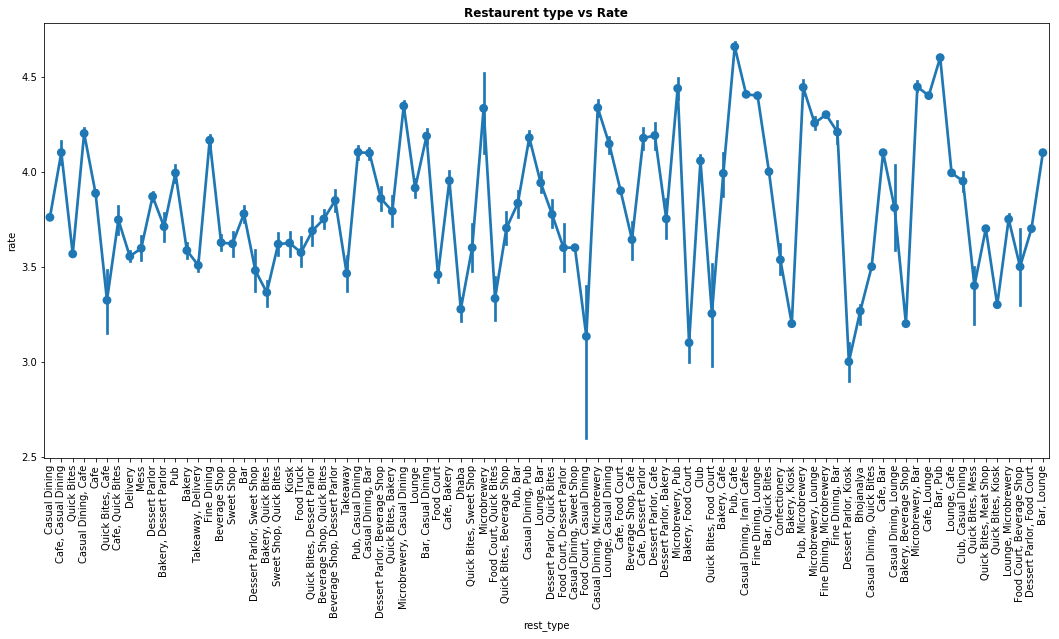

In [228]:
f,ax=plt.subplots(figsize=(18,8))
g = sns.pointplot(x=data["rest_type"], y=data["rate"], data=data)
g.set_xticklabels(g.get_xticklabels(), rotation=90)
plt.title('Restaurent type vs Rate', weight = 'bold')
plt.show()

**Q.10) Print top 10 Cuisines**

In [229]:
cuisines_data = data[data.cuisines.notnull()]
cuisines_data.cuisines = cuisines_data.cuisines.apply(lambda x:x.lower().strip())

In [230]:
cuisines_count= []

for i in cuisines_data.cuisines:
    for j in i.split(','):
        j = j.strip()
        cuisines_count.append(j)

Text(0,0.5,'No of restaurants')

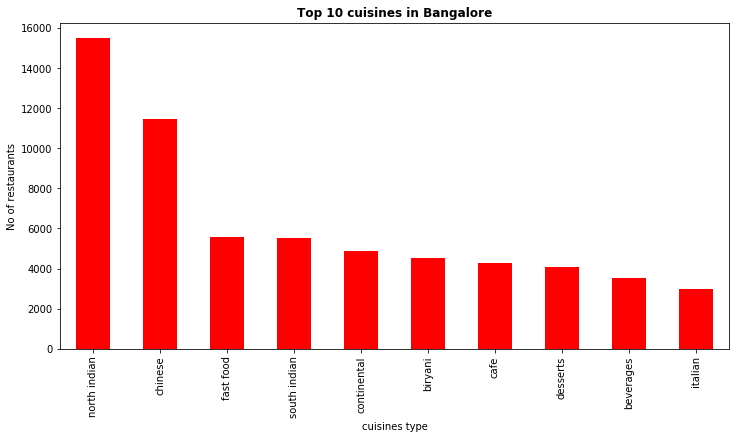

In [231]:
plt.figure(figsize=(12,6)) 
pd.Series(cuisines_count).value_counts()[:10].plot(kind='bar',color= 'r')
plt.title('Top 10 cuisines in Bangalore',weight='bold')
plt.xlabel('cuisines type')
plt.ylabel('No of restaurants')

#### Observation
- North Indian food is at top, followed by chinease and so on.

In [232]:
cuisines_set = set(cuisines_count)
cuisines_word_cloud = ', '.join(cuisines_set)

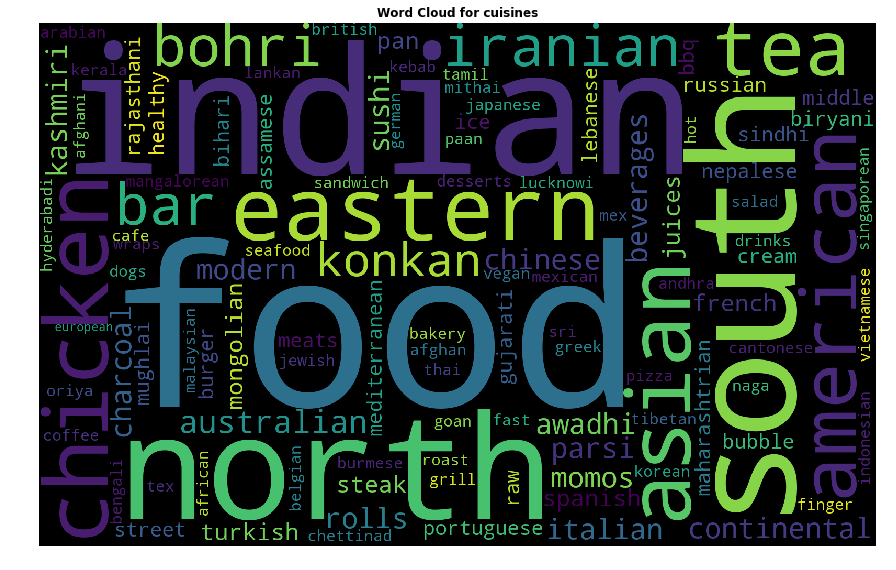

In [233]:
plt.figure( figsize=(15,10) )
wc = WordCloud(width=1600, height=1000,background_color="black", max_words=len(cuisines_word_cloud))
wc.generate(cuisines_word_cloud)
plt.title('Word Cloud for cuisines',weight='bold')
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.imshow(wc)
plt.show()

**Q.11) Lets plot 'Rate' vs 'Online order'**

Text(0.5,1,'rate vs oline order')

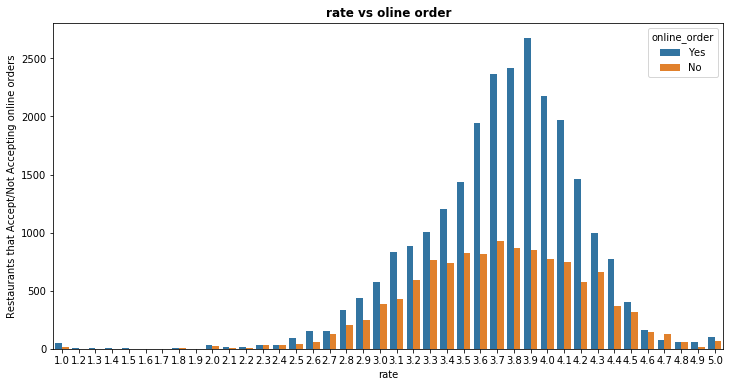

In [234]:
plt.figure(figsize = (12,6))
sns.countplot(x=data['rate'], hue = data['online_order'])
plt.ylabel("Restaurants that Accept/Not Accepting online orders")
plt.title("rate vs oline order",weight = 'bold')

## 3. Model

Till now we were understanding, visualising data. Now let move to build proper Machine Learning model.

In [235]:
# pd.get_dummies ==> Convert categorical variable into dummy/indicator variables.(OneHot encoding)

data['online_order']= pd.get_dummies(data.online_order, drop_first=True)
data['book_table']= pd.get_dummies(data.book_table, drop_first=True)
data

,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,average_cost,reviews_list,menu_item,listed_in(type)
0,Jalsa,1,1,4.1,775,Banashankari,Casual Dining,"pasta, lunch buffet, masala papad, paneer laja...","North Indian, Mughlai, Chinese",800,"[(Rated 4.0, RATED\n A beautiful place to din...",[],Buffet
1,Spice Elephant,1,0,4.1,787,Banashankari,Casual Dining,"momos, lunch buffet, chocolate nirvana, thai g...","Chinese, North Indian, Thai",800,"[(Rated 4.0, RATED\n Had been here for dinner...",[],Buffet
2,San Churro Cafe,1,0,3.8,918,Banashankari,"Cafe, Casual Dining","churros, cannelloni, minestrone soup, hot choc...","Cafe, Mexican, Italian",800,"[(Rated 3.0, RATED\n Ambience is not that goo...",[],Buffet
3,Addhuri Udupi Bhojana,0,0,3.7,88,Banashankari,Quick Bites,masala dosa,"South Indian, North Indian",300,"[(Rated 4.0, RATED\n Great food and proper Ka...",[],Buffet
4,Grand Village,0,0,3.8,166,Basavanagudi,Casual Dining,"panipuri, gol gappe","North Indian, Rajasthani",600,"[(Rated 4.0, RATED\n Very good restaurant in ...",[],Buffet
5,Timepass Dinner,1,0,3.8,286,Basavanagudi,Casual Dining,"onion rings, pasta, kadhai paneer, salads, sal...",North Indian,600,"[(Rated 3.0, RATED\n Food 3/5\nAmbience 3/5\n...",[],Buffet
6,Rosewood International Hotel - Bar & Restaurant,0,0,3.6,8,Mysore Road,Casual Dining,chicken,"North Indian, South Indian, Andhra, Chinese",800,"[(Rated 5.0, RATED\n Awesome food ??Great ser...",[],Buffet
7,Onesta,1,1,4.6,2556,Banashankari,"Casual Dining, Cafe","farmhouse pizza, chocolate banana, virgin moji...","Pizza, Cafe, Italian",600,"[(Rated 5.0, RATED\n I personally really like...",[],Cafes
8,Penthouse Cafe,1,0,4.0,324,Banashankari,Cafe,"pizza, mocktails, coffee, nachos, salad, pasta...","Cafe, Italian, Continental",700,"[(Rated 3.0, RATED\n I had been to this place...",[],Cafes
9,Smacznego,1,0,4.2,504,Banashankari,Cafe,"waffles, pasta, coleslaw sandwich, choco waffl...","Cafe, Mexican, Italian, Momos, Beverages",550,"[(Rated 4.0, RATED\n Easy to locate\nVFM 3.5/...",[],Cafes


In [236]:
data.columns

Index(['name', 'online_order', 'book_table', 'rate', 'votes', 'location',
       'rest_type', 'dish_liked', 'cuisines', 'average_cost', 'reviews_list',
       'menu_item', 'listed_in(type)'],
      dtype='object')

In [237]:
data.drop(columns=['dish_liked','reviews_list','menu_item','listed_in(type)'], inplace  =True)

In [238]:
data['rest_type'] = data['rest_type'].str.replace(',' , '') 
data['rest_type'] = data['rest_type'].astype(str).apply(lambda x: ' '.join(sorted(x.split())))
data['rest_type'].value_counts().head()

Bites Quick       12006
Casual Dining      8720
Cafe               2982
Dessert Parlor     1665
Delivery           1486
Name: rest_type, dtype: int64

In [239]:
data['cuisines'] = data['cuisines'].str.replace(',' , '') 
data['cuisines'] = data['cuisines'].astype(str).apply(lambda x: ' '.join(sorted(x.split())))
data['cuisines'].value_counts().head()

Chinese Indian North                 1956
Indian North                         1907
Indian South                         1034
Chinese Indian Indian North South     941
Bakery Desserts                       698
Name: cuisines, dtype: int64

In [240]:
data.head(3)

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,average_cost
0,Jalsa,1,1,4.1,775,Banashankari,Casual Dining,Chinese Indian Mughlai North,800
1,Spice Elephant,1,0,4.1,787,Banashankari,Casual Dining,Chinese Indian North Thai,800
2,San Churro Cafe,1,0,3.8,918,Banashankari,Cafe Casual Dining,Cafe Italian Mexican,800


## 3.1 Label Encoding 

https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html

Label Encoding ==>
Encode labels with value between 0 and n_classes-1.

In [241]:
from sklearn.preprocessing import LabelEncoder

T = LabelEncoder()                 
data['location'] = T.fit_transform(data['location'])
data['rest_type'] = T.fit_transform(data['rest_type'])
data['cuisines'] = T.fit_transform(data['cuisines'])
data["average_cost"] = data["average_cost"].str.replace(',' , '') 
data["average_cost"] = data["average_cost"].astype('float')


In [242]:
data.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,average_cost
0,Jalsa,1,1,4.1,775,1,39,1279,800.0
1,Spice Elephant,1,0,4.1,787,1,39,1292,800.0
2,San Churro Cafe,1,0,3.8,918,1,31,1079,800.0
3,Addhuri Udupi Bhojana,0,0,3.7,88,1,28,1612,300.0
4,Grand Village,0,0,3.8,166,4,39,1655,600.0


Now everything looks in numeric values. We can proceed with this data.

In [243]:
x = data.drop(['rate','name'],axis = 1)
y = data['rate']

In [244]:
print(x.shape)
print(y.shape)

(36832, 7)
(36832,)


In [245]:
x.head()

,online_order,book_table,votes,location,rest_type,cuisines,average_cost
0,1,1,775,1,39,1279,800.0
1,1,0,787,1,39,1292,800.0
2,1,0,918,1,31,1079,800.0
3,0,0,88,1,28,1612,300.0
4,0,0,166,4,39,1655,600.0


In [246]:
y.head()

0    4.1
1    4.1
2    3.8
3    3.7
4    3.8
Name: rate, dtype: float64

## 3.2 Splitting the data for Model Building 

In [247]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size = 0.3,random_state = 33)

## 3.3 Standardized Data

In [248]:
from sklearn.preprocessing import StandardScaler
std_values=data.select_dtypes(['float64','int64']).columns
scaler = StandardScaler()
scaler.fit(data[std_values])
data[std_values]=scaler.transform(data[std_values])

In [101]:
data.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,average_cost
0,Jalsa,1,1,0.782136,0.422570,-1.332226,0.436567,0.470057,0.404635
1,Spice Elephant,1,0,0.782136,0.435483,-1.332226,0.436567,0.497367,0.404635
2,San Churro Cafe,1,0,0.163207,0.576456,-1.332226,-0.181372,0.049903,0.404635
3,Addhuri Udupi Bhojana,0,0,-0.043103,-0.316731,-1.332226,-0.413100,1.169613,-0.676512
4,Grand Village,0,0,0.163207,-0.232793,-1.218329,0.436567,1.259946,-0.027823


## Model -1 Linear Regression

In [131]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train,y_train)
y_pred_lr = lr.predict(X_test)

mse(y_test, y_pred_lr)

0.17607109182320207

In [100]:
lr.score(X_test, y_test)*100

24.965178553328027

## Model -2 Random Forest Regressor

In [130]:
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor()
rfr.fit(X_train,y_train)
y_pred_rfr = rfr.predict(X_test)

mse(y_test, y_pred_rfr)

0.040759527540970564

In [108]:
rfr.score(X_test,y_test)*100

82.13958621795136

## Model - 3 XGBoost Regressor

In [134]:
import xgboost as xgb

xgbr = xgb.XGBRegressor(metrics="mse")
xgbr.fit(X_train,y_train)
y_pred_xgbr = xgbr.predict(X_test)

mse(y_test, y_pred_xgbr)

0.1283354582211535

In [133]:
xgbr.score(X_test,y_test)*100

45.308295114278714

## Model - 4 SGD Regressor

In [135]:
from sklearn import linear_model

sgdReg = linear_model.SGDRegressor()
sgdReg.fit(X_train,y_train)
y_pred_sgdr = sgdReg.predict(X_test)

mse(y_test, y_pred_sgdr)

1.299508545792538e+31

**Without any hyper param tuning RFR ie Random Forest Regressor it learning something. so let experiment on RFR.**

## Hyperparam Tuning on RFR

In [4]:
from sklearn.metrics import  make_scorer
from sklearn.model_selection import GridSearchCV
from sklearn import metrics


def mse(y, y_pred):
    return np.mean((y_pred - y)**2)

mse_scorer = make_scorer(mse, greater_is_better=False)

In [112]:
tuned_parameters = {'n_estimators': [250,500,1000,1200]}

grd_regressor = GridSearchCV(RandomForestRegressor(), tuned_parameters, cv=10, 
                   n_jobs=-1, verbose=1, scoring=mse_scorer)
grd_regressor.fit(X_train, y_train)

print(grd_regressor.best_score_)
print(grd_regressor.best_params_)

Fitting 10 folds for each of 4 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed: 10.3min finished


-0.03739712823107008
{'n_estimators': 1200}


In [117]:
tuned_parameters = {'max_depth': [None,2,3,4], 'n_estimators':[1200]}

grd_regressor = GridSearchCV(RandomForestRegressor(), tuned_parameters, cv=10, 
                   n_jobs=-1, verbose=1, scoring=mse_scorer)
grd_regressor.fit(X_train, y_train)

print(grd_regressor.best_score_)
print(grd_regressor.best_params_)

Fitting 10 folds for each of 4 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:  7.3min finished


-0.03740392354818689
{'max_depth': None, 'n_estimators': 1200}


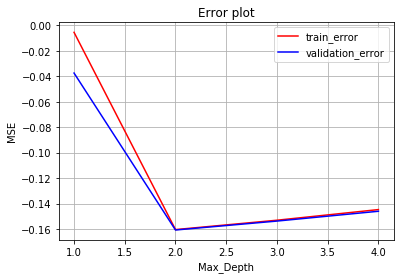

In [140]:
K = list(range(1, 5))

accuracy = [i for i in grd_regressor.cv_results_['mean_train_score']]
accuracy_test = [i for i in grd_regressor.cv_results_['mean_test_score']]

plt.plot(K, accuracy,'r',label='train_error')
plt.plot(K, accuracy_test,'b',label='validation_error')
plt.title('Error plot')
plt.xlabel('Max_Depth') 
plt.ylabel('MSE')
plt.grid('on')
plt.legend()
plt.show()

#### Observation:
- As we can see both train error and validation error are closer, Model is **Not Overfitting.**

## Best Parameter Model

In [142]:
rfr = RandomForestRegressor(max_depth=None,n_estimators=1200,min_samples_split= 2)
rfr.fit(X_train,y_train)
y_pred_rfr = rfr.predict(X_test)


mse(y_test, y_pred_rfr)

0.03597373097766375

In [137]:
rfr.score(X_test,y_test)*100

84.7302001962221

## Let's Visualise output by comparing y_true vs y_pred

In [139]:
Randpred = pd.DataFrame({ "actual": y_test, "pred": y_pred_rfr })
Randpred

,actual,pred
17780,3.6,3.550375
35810,3.8,3.795426
25324,4.1,4.077750
13990,3.5,3.432583
8655,3.1,3.076889
48193,4.3,4.299167
36352,3.7,3.704717
45728,3.2,3.171917
965,4.2,4.195417
51331,3.3,3.356688


### MSE = 0.036 , It is good Model still can we still improved Model?

## One Hot Encoding (Feature Engineering)

Can we consider only **One Hot** features. I mean convert all features in One Hot encoding and check the result.

In [5]:
onehot = pd.read_csv("data/zomato.csv")
onehot.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [6]:
onehot.shape

(51717, 17)

In [7]:
# check for duplicate values
print("No of Duplicates in dataset:  ",onehot.duplicated().sum())
# drop the duplicates
onehot.drop_duplicates(inplace=True)

No of Duplicates in dataset:   0


***This time we will drop all Null values. Last time we saved some Nullvalues by converting them to relative values.  But in this run we will check all values. Also we point are 51k by removing NULL it will be somewhere around 23k. Frankly speaking 23k is also good enough points to experiment.***

In [8]:
onehot['rate'] = onehot['rate'].replace('NEW',np.NaN) # replace 'NEW' values with NaN
onehot['rate'] = onehot['rate'].replace('-',np.NaN) # replace '-' value with NaN
onehot.dropna(how = 'any', inplace = True) # remove all NaN

onehot['rate'] = onehot.loc[:,'rate'].replace('[ ]','',regex = True) # replace [] with '' string
onehot['rate'] = onehot['rate'].astype(str) # convert to string
onehot['rate'] = onehot['rate'].apply(lambda r: r.replace('/5','')) # replace '/5' character with '' string
onehot['rate'] = onehot['rate'].apply(lambda r: float(r)) # convert string back to float

In [9]:
onehot.shape

(23046, 17)

In [10]:
onehot['cuisines'] = onehot['cuisines'].str.replace(',' , '') # replace ',' with '' string
onehot['cuisines'] = onehot['cuisines'].astype(str).apply(lambda x: ' '.join(sorted(x.split()))) # add white space
onehot['cuisines'].unique() # find unique values

array(['Chinese Indian Mughlai North', 'Chinese Indian North Thai',
       'Cafe Italian Mexican', ...,
       'BBQ Continental Indian Italian North', 'Nepalese Tibetan',
       'Andhra Biryani Hyderabadi'], dtype=object)

In [11]:
onehot['rest_type'] = onehot['rest_type'].str.replace(',' , '') 
onehot['rest_type'] = onehot['rest_type'].astype(str).apply(lambda x: ' '.join(sorted(x.split())))
onehot['rest_type'].value_counts().head()

Casual Dining        7298
Bites Quick          5224
Cafe                 2321
Bar Casual Dining    1308
Dessert Parlor       1074
Name: rest_type, dtype: int64

In [12]:
onehot['dish_liked'] = onehot['dish_liked'].str.replace(',' , '') 
onehot['dish_liked'] = onehot['dish_liked'].astype(str).apply(lambda x: ' '.join(sorted(x.split())))
onehot['dish_liked'].value_counts().head()

Biryani            179
Friendly Staff      68
Waffles             67
Biryani Chicken     66
Paratha             56
Name: dish_liked, dtype: int64

### One Hot Encoding 

In [18]:
dummy_rest_type=pd.get_dummies(onehot['rest_type'])
dummy_city=pd.get_dummies(onehot['location'])
dummy_cuisines=pd.get_dummies(onehot['cuisines'])
dummy_dishliked=pd.get_dummies(onehot['dish_liked'])

In [14]:
# visualise dummy_rest_type
dummy_rest_type.head(2)

,Bakery,Bakery Bites Quick,Bakery Cafe,Bakery Dessert Parlor,Bar,Bar Bites Quick,Bar Cafe,Bar Casual Dining,Bar Dining Fine,Bar Lounge,...,Food Truck,Kiosk,Lounge,Lounge Microbrewery,Mess,Microbrewery,Microbrewery Pub,Pub,Shop Sweet,Takeaway
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [15]:
dummy_rest_type.shape

(23046, 53)

In [16]:
# visualise dummy_city
dummy_city.head(2)

,BTM,Banashankari,Banaswadi,Bannerghatta Road,Basavanagudi,Basaveshwara Nagar,Bellandur,Bommanahalli,Brigade Road,Brookefield,...,Ulsoor,Uttarahalli,"Varthur Main Road, Whitefield",Vasanth Nagar,Vijay Nagar,West Bangalore,Whitefield,Wilson Garden,Yelahanka,Yeshwantpur
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [17]:
dummy_city.shape

(23046, 88)

In [19]:
# visualise dummy_cuisines
dummy_cuisines.head(2)

,Afghan Biryani Indian Mughlai North,Afghan Chinese Fast Food Gujarati Indian North Rajasthani,Afghan Indian Lucknowi North,Afghan Indian Mughlai North,Afghan Indian Mughlai North Turkish,Afghan Indian North,Afghan Lebanese Mediterranean,Afghani Indian Mughlai North,Afghani Indian North,African Beverages Burger Desserts Fast Food,...,Pizza Salad,Pizza Salad Sandwich,Rajasthani,Rolls Turkish,Salad Vietnamese,Seafood,Spanish,Thai,Tibetan,Vietnamese
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [20]:
dummy_cuisines.shape

(23046, 1293)

In [21]:
# visualise dummy_dishliked
dummy_dishliked.head(2)

,65 Andhra Balls Biryani Biryani Biryani Biryani Chicken Chicken Hyderabadi Keema Mutton Mutton Mutton Pepper,65 Avakai Biryani Chicken Chicken Chicken Dragon Fry Kodi Lassi Masala Paneer Prawns Tikka Vepudu,65 Biryani Chicken Hyderabadi,Aalo Aloo Bhaja Bhetki Chicken Doi Fish Kasha Katla Paturi Posto Rasmalai,Aalo Alur Bhaja Dom Fish Fry Thali,Aalo Bhaja Biryani Chicken Chicken Curry Fish Thali,Aalo Bhaja Biryani Chicken Devils Egg Kosha Luchi Mughlai Mutton Paratha Rasgulla,Aalo Bhaja Curry Doi Fish Kasha Katla Kosha Mutton Mutton Mutton Mutton Thali,Aam Aloo Butter Chicken Chicken Chicken Lassi Panna Paratha Punjabi Tandoori Tikki,Aam Basil Butter Gajar Halwa Ka Manchow Masala Panna Panneer Rabri Salads Soup Soup Tomato,...,Sandwiches Tea,Shakes Thick,Shawarma,Tea,Thali,Thali Veg,Tikka,Vada,Vegetarian,Waffles
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [22]:
dummy_dishliked.shape

(23046, 4787)

### Create Final DF

In [23]:
final=pd.concat([onehot,dummy_rest_type,dummy_city,dummy_cuisines,dummy_dishliked],axis=1)
final.shape

(23046, 6238)

### Deleting the Unwanted columns 

In [24]:
final.drop(columns=['rest_type','location','cuisines','dish_liked','name','phone'] , inplace=True)
final.drop(columns=['reviews_list','menu_item','listed_in(type)','listed_in(city)'], inplace=True)
final.drop(columns=['url','address'], inplace=True)

In [25]:
final['approx_cost(for two people)'] = final['approx_cost(for two people)'].str.replace(',' , '') 

In [26]:
final['online_order']=pd.get_dummies(final['online_order'])
final['book_table']=pd.get_dummies(final['book_table'])
final

,online_order,book_table,rate,votes,approx_cost(for two people),Bakery,Bakery Bites Quick,Bakery Cafe,Bakery Dessert Parlor,Bar,...,Sandwiches Tea,Shakes Thick,Shawarma,Tea,Thali,Thali Veg,Tikka,Vada,Vegetarian,Waffles
0,0,0,4.1,775,800,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,4.1,787,800,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,3.8,918,800,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,1,3.7,88,300,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,1,3.8,166,600,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,1,3.8,286,600,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,4.6,2556,600,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,1,4.0,324,700,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,1,4.2,504,550,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10,0,1,4.1,402,500,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [27]:
x = final.drop(['rate'],axis=1)
y = final['rate']

### Train Test Split

In [28]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size = 0.3,random_state = 33)

#### Persistence Object to local disk

In [31]:
from joblib import dump,load

dump(X_train, 'one_hot_X_train')
dump(X_test, 'one_hot_X_test')
dump(y_train, 'one_hot_y_train')
dump(y_test, 'one_hot_y_test')

['one_hot_y_test']

Let's directly jump to Random Forest Regressor.

## Model -5 Random Forest Regressor

In [40]:
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor()
rfr.fit(X_train,y_train)
y_pred_rfr = rfr.predict(X_test)

mse(y_test, y_pred_rfr)

0.015945684855922966

In [41]:
rfr.score(X_test,y_test)*100

90.69061459399016

#### Observation:

- This is brilliant, last we saw MSE = 0.359 here it is 0.015, **without hyperparam tuning.**

## Hyperparam Tuning for RFR One Hot Encoding

In [ ]:
tuned_parameters = {'n_estimators': [250,500,1000,1200]}

grd_regressor = GridSearchCV(RandomForestRegressor(), tuned_parameters, cv=10, 
                   n_jobs=-1, verbose=1, scoring=mse_scorer)
grd_regressor.fit(X_train, y_train)

In [37]:
rfr = RandomForestRegressor(n_estimators =200)
rfr.fit(X_train,y_train)
y_pred_rfr = rfr.predict(X_test)

mse(y_test, y_pred_rfr)

0.01403770438026325

In [38]:
rfr.score(X_test,y_test)*100

91.80452884449402

# Visualise final outcome

In [39]:
Randpred = pd.DataFrame({ "actual": y_test, "pred": y_pred_rfr })
Randpred

,actual,pred
35957,4.0,4.000000
4975,4.0,3.996000
21830,3.9,3.894000
11982,3.7,3.706500
2597,3.8,3.850500
35155,4.5,4.500000
24001,3.4,3.522187
42314,3.8,3.804687
2249,3.9,3.907500
18336,2.8,2.912401


## 4. Model Compare

In [45]:
from prettytable import PrettyTable


x = PrettyTable()
x.field_names =  ['Model','MSE','Accuracy']


x.add_row(["Linear Regression ", 0.17607,24.96517])

x.add_row(["Random Forest Regressor ", 0.12833,45.30829])
x.add_row(["SGD Regressor ", 1.299e+31,11.2578])

x.add_row(["Tune Random Forest Regressor ",0.03597,84.73020])
x.add_row(["OneHot Random Forest Regressor ", 0.015945,90.69061])

x.add_row(["Tune OneHot Random Forest Regressor", 0.01403,91.80452])


print('\n')
print(x)



+-------------------------------------+-----------+----------+
|                Model                |    MSE    | Accuracy |
+-------------------------------------+-----------+----------+
|          Linear Regression          |  0.17607  | 24.96517 |
|       Random Forest Regressor       |  0.12833  | 45.30829 |
|            SGD Regressor            | 1.299e+31 | 11.2578  |
|    Tune Random Forest Regressor     |  0.03597  | 84.7302  |
|   OneHot Random Forest Regressor    |  0.015945 | 90.69061 |
| Tune OneHot Random Forest Regressor |  0.01403  | 91.80452 |
+-------------------------------------+-----------+----------+


## 5. Summary

We collect data from CSV file, half of values were missing, we did not throw up all values, instead of throw NULL value we tried to fill estimate values using related colomn. 
<br>
And we try different models Random Forest Regressor was most learning model, so we tune model using **gridsearch** technic, we got 84.73% Accuracy model was good but not great, so we did some **feature engineering**.
<br>
And result was brilliant. thought it lot of time for learning.

# Reference:

- https://medium.com/@purnasaigudikandula/zomato-bangalore-restaurant-analysis-and-rating-prediction-df277321c7cd
- https://www.kaggle.com/hindamosh/funny-banglore-restaurants-analysis